In [1]:
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime as dt

from statsmodels.tsa.stattools import adfuller, acf, pacf

from statsmodels.tsa.arima_model import ARMA

In [3]:
import matplotlib.pyplot as plt

In [4]:
pd.read_csv('C:/Users/komajha/Documents/Big Data/AirPassengers.csv')

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
data=pd.read_csv('C:/Users/komajha/Documents/Big Data/AirPassengers.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
#convert in proper date time format

data['Month']=data['Month'].apply(lambda x: dt(int(x[0:4]),int(x[5:]),10))

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [10]:
data.head()

,Month,#Passengers
0,1949-01-10,112
1,1949-02-10,118
2,1949-03-10,132
3,1949-04-10,129
4,1949-05-10,121


In [11]:
data.set_index('Month',inplace=True)

In [12]:
data.head()

,#Passengers
Month,
1949-01-10,112
1949-02-10,118
1949-03-10,132
1949-04-10,129
1949-05-10,121


In [13]:
ts=data['#Passengers']

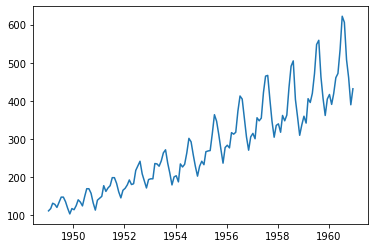

In [14]:
plt.plot(ts)

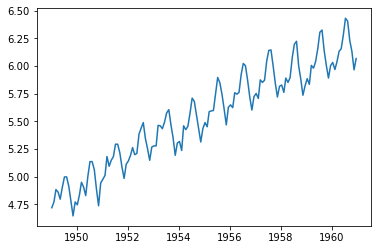

In [15]:
ts_log=np.log(ts) #compression - so used log
plt.plot(ts_log)

In [16]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52,center=False).mean() 
    rolstd = timeseries.rolling(window=52,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best')
    
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


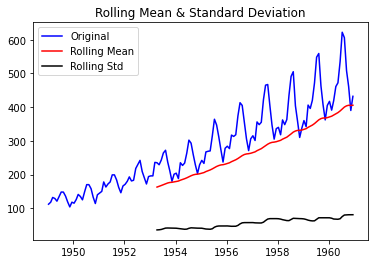

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
test_stationarity(data['#Passengers'])

In [18]:
movingAverage=ts_log.rolling(window=12).mean()
movingSTD=ts_log.rolling(window=12).std()

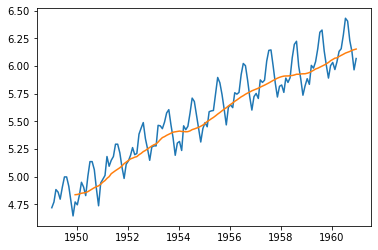

In [19]:
plt.plot(ts_log)
plt.plot(movingAverage)

In [20]:
ts_log_mv_diff=ts_log-movingAverage

In [21]:
ts_log_mv_diff.head()

Month
1949-01-10   NaN
1949-02-10   NaN
1949-03-10   NaN
1949-04-10   NaN
1949-05-10   NaN
Name: #Passengers, dtype: float64

In [22]:
ts_log_mv_diff.dropna(inplace=True)

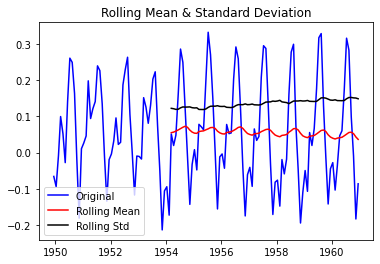

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [23]:
test_stationarity(ts_log_mv_diff)

In [24]:
data.tail()

,#Passengers
Month,
1960-08-10,606
1960-09-10,508
1960-10-10,461
1960-11-10,390
1960-12-10,432


In [25]:
ts_log_mv_diff.tail()

Month
1960-08-10    0.282363
1960-09-10    0.098235
1960-10-10   -0.009230
1960-11-10   -0.182690
1960-12-10   -0.085789
Name: #Passengers, dtype: float64

In [26]:
ts_log_mv_diff.head()

Month
1949-12-10   -0.065494
1950-01-10   -0.093449
1950-02-10   -0.007566
1950-03-10    0.099416
1950-04-10    0.052142
Name: #Passengers, dtype: float64

C:\Users\komajha\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


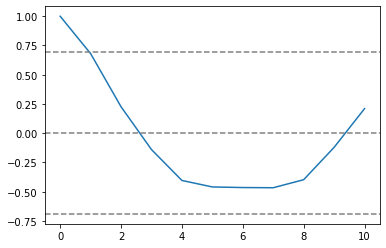

In [30]:
plt.plot(np.arange(0,11),acf(ts_log_mv_diff,nlags=10)) #Q=errorterm=MA
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')

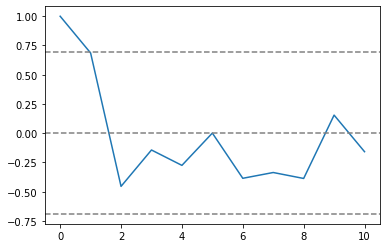

In [31]:
plt.plot(np.arange(0,11),pacf(ts_log_mv_diff,nlags=10)) #Q=errorterm=MA
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_mv_diff)),linestyle='--',color='gray')

2 p=1 or 2 AR

In [35]:
import warnings
warnings.filterwarnings("ignore")

model=ARMA(ts_log_mv_diff,order=(2,1)) #(1,0)



In [36]:
results=model.fit()

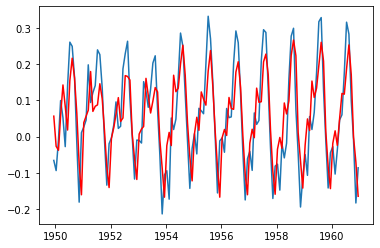

In [37]:
plt.plot(ts_log_mv_diff)
plt.plot(results.fittedvalues,color='red')